<a href="https://colab.research.google.com/github/amratallah123/PatternRecognation/blob/master/project_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import matplotlib.pyplot as plt             
import seaborn as sn
import pandas as pd

# Loading the dataset

In [ ]:
top_words=5000
input_length= 500
(X_train,y_train),(X_test, y_test)= imdb.load_data(num_words=top_words)

# Convert movie review data to feature matrix

In [ ]:

X_train =  sequence.pad_sequences(X_train,maxlen=input_length)
print(); print(X_train.shape); print(X_train)

X_test =  sequence.pad_sequences(X_test,maxlen=input_length)
print(); print(X_train.shape); print(X_train)


(25000, 500)
[[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]

(25000, 500)
[[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


# setup a CNN network


In [ ]:
# model = Sequential()
# model.add(Embedding(top_words,32,input_length=input_length))
# model.add(Conv1D(filters=32,kernel_size=3,padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(250,activation='relu'))
# model.add(Dense(1,activation='sigmoid'))

In [ ]:
model = Sequential()
model.add(Embedding(top_words,32,input_length=input_length))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=512,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=50,batch_size=128)

Epoch 1/50
196/196 [==============================] - 75s 382ms/step - loss: 0.5450 - accuracy: 0.6778 - val_loss: 0.2935 - val_accuracy: 0.8782
Epoch 2/50
196/196 [==============================] - 71s 363ms/step - loss: 0.2399 - accuracy: 0.9084 - val_loss: 0.2529 - val_accuracy: 0.8961
Epoch 3/50
196/196 [==============================] - 77s 394ms/step - loss: 0.1524 - accuracy: 0.9458 - val_loss: 0.2762 - val_accuracy: 0.8936
Epoch 4/50
196/196 [==============================] - 70s 360ms/step - loss: 0.0969 - accuracy: 0.9682 - val_loss: 0.3583 - val_accuracy: 0.8862
Epoch 5/50
196/196 [==============================] - 70s 359ms/step - loss: 0.0580 - accuracy: 0.9804 - val_loss: 0.4583 - val_accuracy: 0.8824
Epoch 6/50
196/196 [==============================] - 74s 378ms/step - loss: 0.0350 - accuracy: 0.9884 - val_loss: 0.5294 - val_accuracy: 0.8829
Epoch 7/50
196/196 [==============================] - 72s 369ms/step - loss: 0.0234 - accuracy: 0.9927 - val_loss: 0.5963 - val_ac

* final evaluation of the model

In [ ]:

scores = model.evaluate(X_test,y_test,verbose=1)

782/782 [==============================] - 17s 22ms/step - loss: 1.6884 - accuracy: 0.8774


# plots of accuracy and loss function and some predictions 

In [ ]:
prediction = model.predict(X_test)

In [ ]:
import numpy as np
prediction = np.asarray(prediction).reshape(1, -1)[0,:]
print(prediction[:5])

[1.7490110e-17 1.0000000e+00 9.3644643e-01 9.9989164e-01 1.0000000e+00]


In [ ]:
print(y_test[:5])

[0 1 1 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
true = pd.Categorical(list(np.where(np.array(y_test) == 1, 'good','bad')), categories = ['good','bad'])
prediction1 = pd.Categorical(list(np.where(np.array(prediction) == 1, 'good','bad')), categories = ['good','bad'])

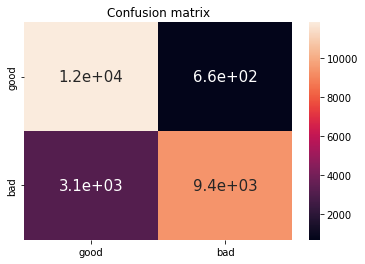

In [ ]:
CM = confusion_matrix(true, prediction1)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 15}, 
           xticklabels=['good','bad'], 
           yticklabels=['good','bad'], ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(20,10))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

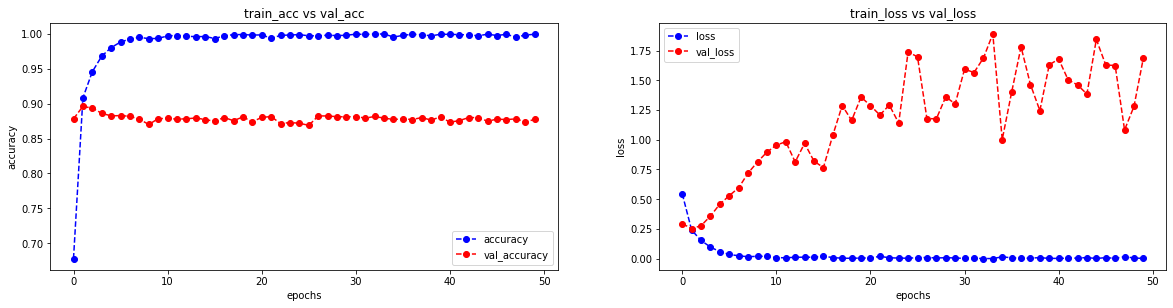

In [ ]:
plot_accuracy_loss(history)